<a href="https://colab.research.google.com/github/teja-1403/Movie-Recommendation-System-using-Python/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

# **1. Necessary Libraries to be imported**

In [76]:
# Install necessary libraries
!pip install numpy pandas scikit-surprise

# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


# **2. Load the Datasets**

In [3]:
# Load the dataset
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Display the first few rows
print("Movies Dataset:")
print(movies_df.head())
print("\nRatings Dataset:")
print(ratings_df.head())

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Dataset:
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


# **3. Data Preprocessing**

In [4]:
# Check for missing values in both datasets
print("Missing values in Movies Dataset:")
print(movies_df.isnull().sum())

print("\nMissing values in Ratings Dataset:")
print(ratings_df.isnull().sum())

Missing values in Movies Dataset:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Ratings Dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [5]:
# Display data types of each column
print("Movies Data Types:")
print(movies_df.dtypes)

print("\nRatings Data Types:")
print(ratings_df.dtypes)

# Convert timestamp to datetime
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

Movies Data Types:
movieId     int64
title      object
genres     object
dtype: object

Ratings Data Types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


# **4. Data Exploration**

In [6]:
# Get basic statistics for ratings
print("Basic Statistics of Ratings:")
print(ratings_df.describe())

Basic Statistics of Ratings:
              userId        movieId         rating  \
count  105339.000000  105339.000000  105339.000000   
mean      364.924539   13381.312477       3.516850   
min         1.000000       1.000000       0.500000   
25%       192.000000    1073.000000       3.000000   
50%       383.000000    2497.000000       3.500000   
75%       557.000000    5991.000000       4.000000   
max       668.000000  149532.000000       5.000000   
std       197.486905   26170.456869       1.044872   

                           timestamp  
count                         105339  
mean   2005-10-27 14:39:31.974254720  
min              1996-04-03 20:55:54  
25%       2000-10-09 14:13:17.500000  
50%              2005-05-03 21:00:56  
75%       2010-06-02 16:26:38.500000  
max              2016-01-10 05:48:39  
std                              NaN  


In [7]:
# Count unique movies and users
unique_movies = movies_df['movieId'].nunique()
unique_users = ratings_df['userId'].nunique()

print(f"\nTotal Unique Movies: {unique_movies}")
print(f"Total Unique Users: {unique_users}")


Total Unique Movies: 10329
Total Unique Users: 668


In [8]:
# Create a pivot table (user-movie matrix)
user_movie_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
print("User-Movie Matrix:")
print(user_movie_matrix.head())

User-Movie Matrix:
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           5.0     0.0     2.0     0.0     3.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     3.0     0.0     3.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  144482  144656  144976  146344  146656  146684  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0   

# **5. User-Based Collaborative Filtering**

In [60]:
# Compute user similarity matrix
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

print("\nUser Similarity Matrix:")
print(user_similarity_df.head())


User Similarity Matrix:
userId       1         2         3         4         5         6         7    \
userId                                                                         
1       1.000000  0.101113  0.210044  0.128766  0.057896  0.077130  0.358090   
2       0.101113  1.000000  0.115559  0.034610  0.032705  0.028305  0.062914   
3       0.210044  0.115559  1.000000  0.058208  0.044426  0.012816  0.084522   
4       0.128766  0.034610  0.058208  1.000000  0.019298  0.005781  0.059089   
5       0.057896  0.032705  0.044426  0.019298  1.000000  0.053378  0.080822   

userId       8         9         10   ...       659       660       661  \
userId                                ...                                 
1       0.097434  0.239189  0.026663  ...  0.291162  0.144741  0.106583   
2       0.471918  0.194232  0.000000  ...  0.068325  0.000000  0.477330   
3       0.066620  0.459703  0.068454  ...  0.152078  0.301021  0.081626   
4       0.024420  0.050572  0.000000  .

In [63]:
def recommend_movies_user_cf(user_id, num_recommendations=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:num_recommendations+1]
    similar_users_movies = ratings_df[ratings_df['userId'].isin(similar_users.index)]
    recommended_movies = similar_users_movies.groupby('movieId').agg({'rating': 'mean'}).sort_values('rating', ascending=False).head(num_recommendations)
    recommended_movies = recommended_movies.merge(movies_df, on='movieId')
    return recommended_movies[['title', 'rating']]

In [64]:
# Get recommendations for a specific user
user_id = 76
recommendations = recommend_movies_user_cf(user_id, num_recommendations=5)
print("\nUser-Based CF Recommended Movies:")
print(recommendations)


User-Based CF Recommended Movies:
                                   title  rating
0           Bourne Ultimatum, The (2007)     5.0
1                      Grindhouse (2007)     5.0
2  Amores Perros (Love's a Bitch) (2000)     5.0
3                       Rock, The (1996)     5.0
4   Independence Day (a.k.a. ID4) (1996)     5.0


In [65]:
# Compute item similarity matrix
item_similarity = cosine_similarity(user_movie_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)
print("\nItem Similarity Matrix:")
print(item_similarity_df.head())


Item Similarity Matrix:
movieId    1         2         3         4         5         6         7       \
movieId                                                                         
1        1.000000  0.383068  0.337453  0.134724  0.360289  0.392823  0.347485   
2        0.383068  1.000000  0.199207  0.123377  0.216562  0.302732  0.201137   
3        0.337453  0.199207  1.000000  0.173366  0.514108  0.312031  0.338144   
4        0.134724  0.123377  0.173366  1.000000  0.127038  0.173900  0.098651   
5        0.360289  0.216562  0.514108  0.127038  1.000000  0.228020  0.418153   

movieId    8         9         10      ...    144482    144656    144976  \
movieId                                ...                                 
1        0.092432  0.123093  0.368602  ...  0.065762  0.000000  0.075491   
2        0.056784  0.103498  0.422472  ...  0.090899  0.090899  0.052834   
3        0.173191  0.228211  0.159173  ...  0.000000  0.000000  0.046041   
4        0.190777  0.028099

# **6. Item-Based Collaborative Filtering**

In [67]:
def recommend_movies_item_cf(user_id, num_recommendations=5):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    scores = {}
    for _, row in user_ratings.iterrows():
        similar_items = item_similarity_df[row['movieId']].sort_values(ascending=False)
        for movie_id, similarity in similar_items.items():
            if movie_id not in scores:
                scores[movie_id] = 0
            scores[movie_id] += similarity * row['rating']
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]
    recommended_movies = pd.DataFrame(sorted_scores, columns=['movieId', 'score']).merge(movies_df, on='movieId')
    return recommended_movies[['title', 'score']]

In [68]:
# Get recommendations for a specific user
user_id = 76
item_cf_recommendations = recommend_movies_item_cf(user_id, num_recommendations=5)
print("\nItem-Based CF Recommended Movies:")
print(item_cf_recommendations)


Item-Based CF Recommended Movies:
                                               title      score
0  Lord of the Rings: The Fellowship of the Ring,...  46.773764
1  Lord of the Rings: The Return of the King, The...  46.637068
2      Lord of the Rings: The Two Towers, The (2002)  45.627218
3                                 Matrix, The (1999)  43.727971
4                                  Fight Club (1999)  42.443576


## **7. Model-Based Collaborative Filtering (SVD)**

In [69]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Train SVD Model
svd_model = SVD()
svd_model.fit(trainset)

# Evaluate the Model
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"\nSVD Model RMSE: {rmse}")

def recommend_movies_svd(user_id, num_recommendations=5):
    rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].unique()
    predictions = [
        (movie_id, svd_model.predict(user_id, movie_id).est)
        for movie_id in movies_df['movieId'].unique() if movie_id not in rated_movies
    ]
    top_recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:num_recommendations]
    recommended_movies = pd.DataFrame(top_recommendations, columns=['movieId', 'predicted_rating']).merge(movies_df, on='movieId')
    return recommended_movies[['title', 'predicted_rating']]

# Get recommendations for a specific user
user_id = 76
svd_recommendations = recommend_movies_svd(user_id, num_recommendations=5)
print("\nSVD-Based Recommended Movies:")
print(svd_recommendations)

RMSE: 0.8711

SVD Model RMSE: 0.8710780325234548

SVD-Based Recommended Movies:
                                               title  predicted_rating
0                                       Fargo (1996)          4.747528
1                   Shawshank Redemption, The (1994)          4.684829
2             Monty Python and the Holy Grail (1975)          4.608368
3  Léon: The Professional (a.k.a. The Professiona...          4.605484
4                          Lawrence of Arabia (1962)          4.564279


# **8. Exploring and Visualization of data**

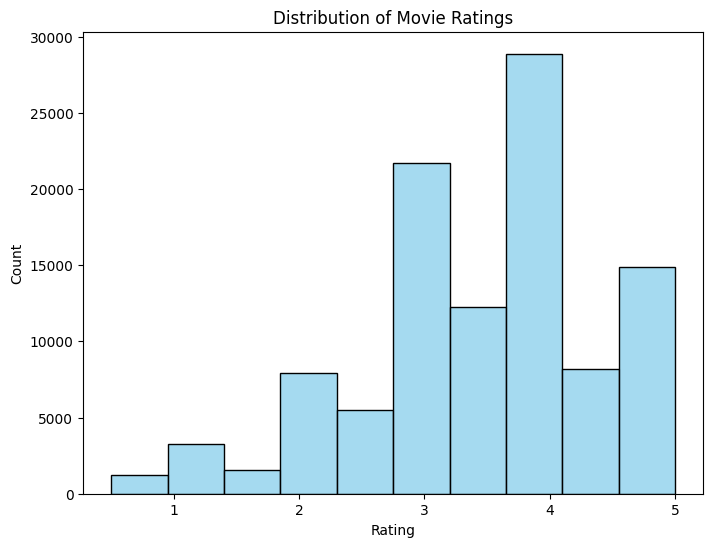

In [70]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# **User Similarities Matrix Heatmap**

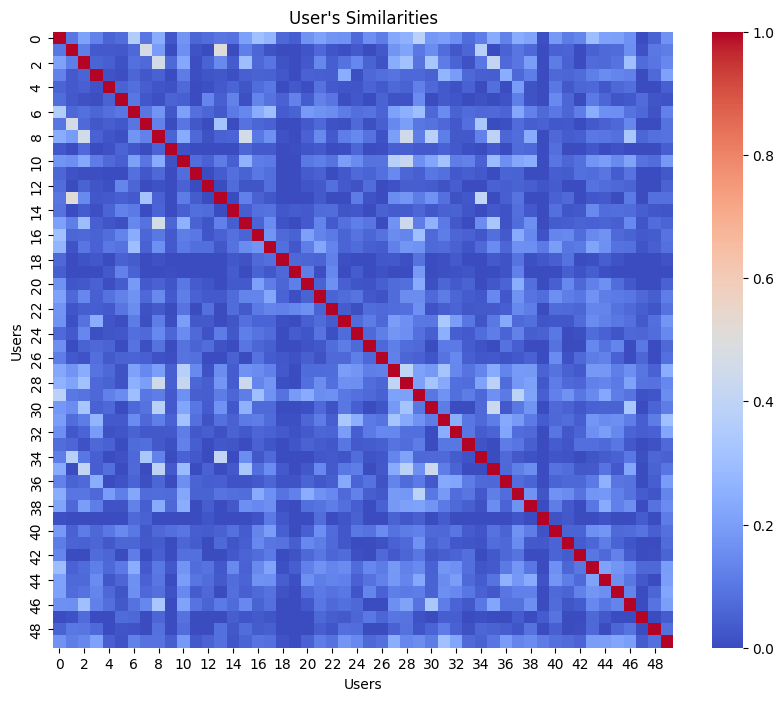

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity[:50, :50], cmap='coolwarm', cbar=True)
plt.title("User's Similarities")
plt.xlabel("Users")
plt.ylabel("Users")
plt.show()

# **Movie Similarities Matrix Heatmap**

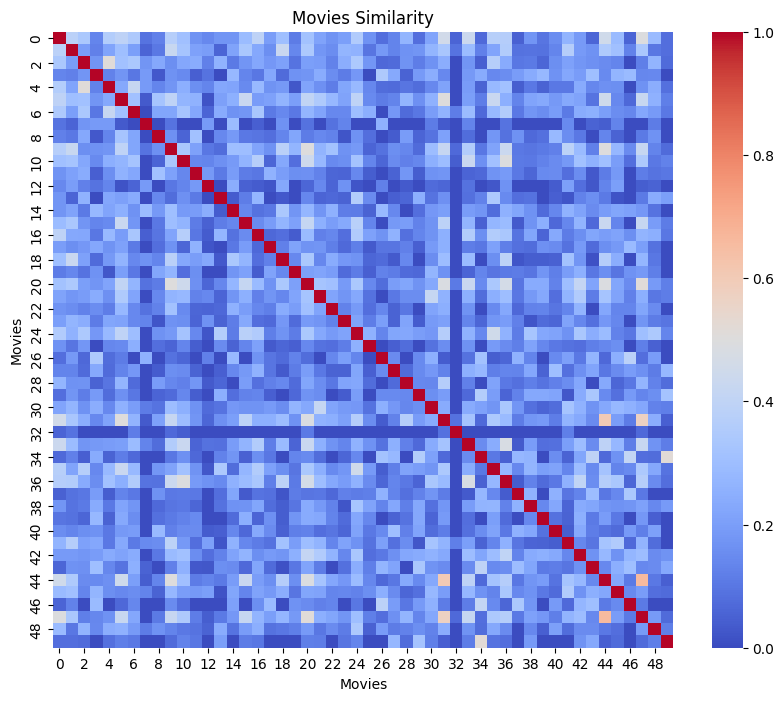

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(item_similarity[:50, :50], cmap='coolwarm', cbar=True)
plt.title("Movies Similarity")
plt.xlabel("Movies")
plt.ylabel("Movies")
plt.show()

# **Total Views of the Top Films**

<ipython-input-73-94e06d0c3fda>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='views', data=top_movies, palette='Blues_d')


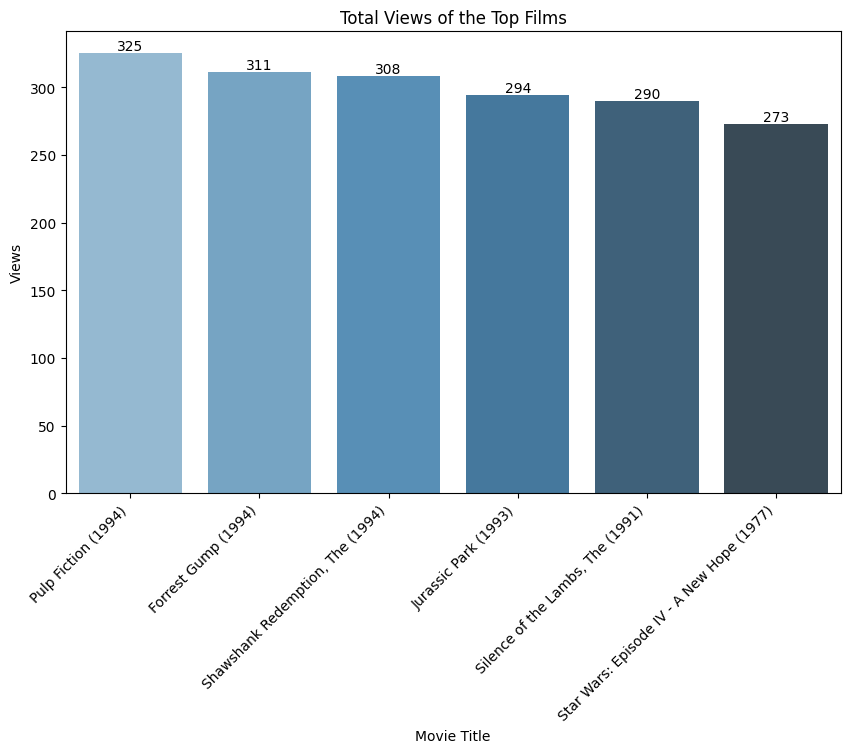

In [73]:
movie_views = ratings_df['movieId'].value_counts()
table_views = pd.DataFrame({'movieId': movie_views.index, 'views': movie_views.values})
table_views = table_views.merge(movies_df[['movieId', 'title']], on='movieId', how='left')
table_views = table_views.sort_values(by='views', ascending=False).reset_index(drop=True)

# Display top 6 movies
top_movies = table_views.head(6)

# Plot total views of the top films
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='views', data=top_movies, palette='Blues_d')

for index, value in enumerate(top_movies['views']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.title("Total Views of the Top Films")
plt.xlabel("Movie Title")
plt.ylabel("Views")
plt.show()

# **Heatmap of Movie Ratings**


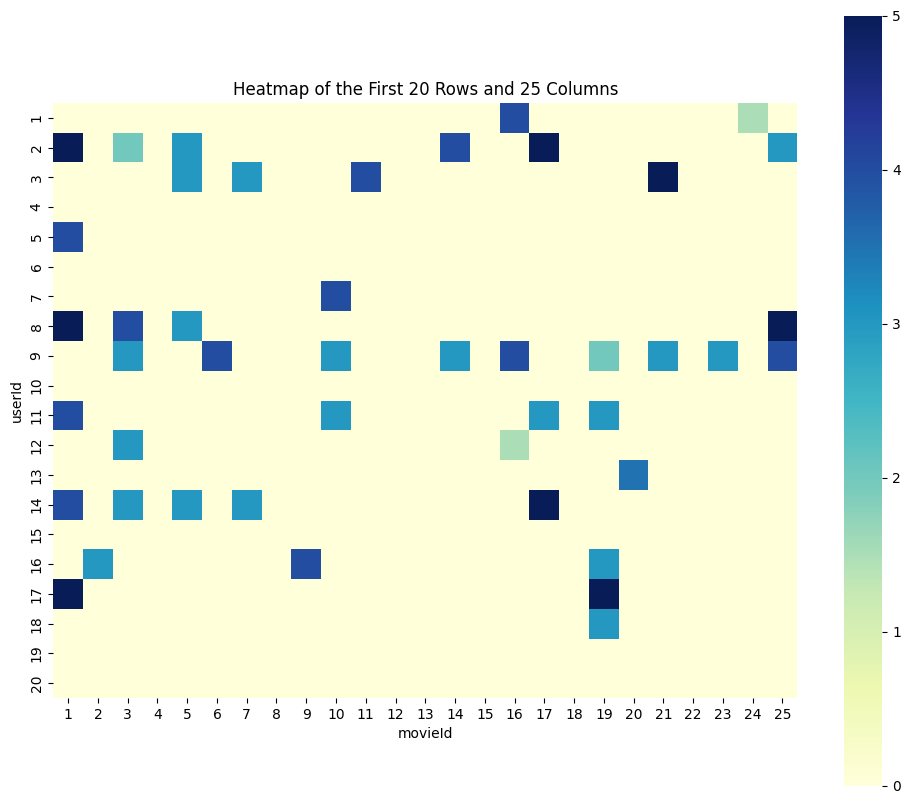

In [75]:
plt.figure(figsize=(12, 10))
subset_user_movie_matrix = user_movie_matrix.iloc[:20, :25]
sns.heatmap(subset_user_movie_matrix, cmap="YlGnBu", cbar=True, square=True)
plt.title("Heatmap of the First 20 Rows and 25 Columns")
plt.show()

# **Normalized Ratings Heatmap**

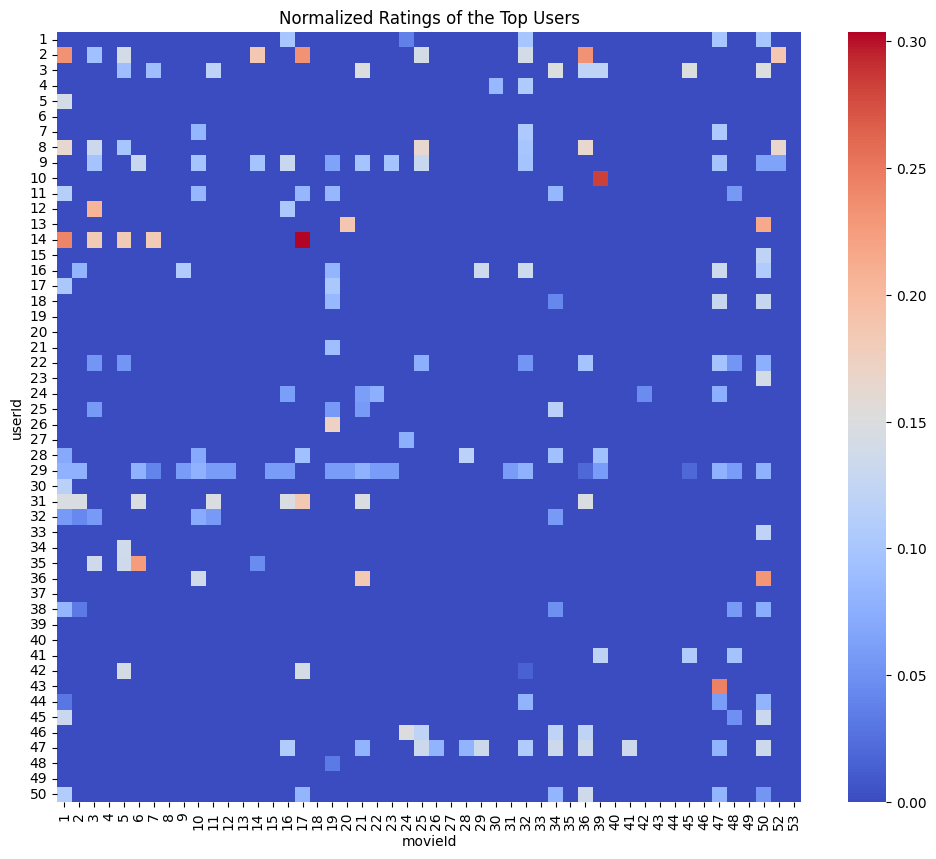

In [77]:
normalized_ratings = normalize(user_movie_matrix.fillna(0), axis=1)
normalized_ratings_df = pd.DataFrame(normalized_ratings, index=user_movie_matrix.index, columns=user_movie_matrix.columns)
plt.figure(figsize=(12, 10))
sns.heatmap(normalized_ratings_df.iloc[:50, :50], cmap="coolwarm", cbar=True)
plt.title("Normalized Ratings of the Top Users")
plt.show()